In [5]:
# all the basic stuff 
import numpy as np
import matplotlib.pyplot as plt
import cv2
grey = r'albert-einstein_gray.jpg'
colour = r'tulips.jpg'
I_grey = cv2.imread(grey, cv2.IMREAD_GRAYSCALE)
I_BGR = cv2.imread(colour)


In [6]:
# displaying image in its actual size
import matplotlib as mpl
def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    H,W = I.shape
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I, cmap = 'gray')
    plt.show

In [7]:
# interpolating pixel intensity
def f_bilinearInterpolate(r,c,I):  # function which takes row, colum and source image
    lc = int(c)   # left colum from point, int rounds down to left
    rc = lc + 1   # right colum from point
    wr = c - lc   # weighting for the right colum
    wl = rc - c
    tr = int(r)   # top row
    br = tr + 1   # bottom row
    wt = br - r
    wb = r - tr
    if tr >= 0 and br < I.shape[0] and lc >=0 and rc < I.shape[1]:
        a = wl*I[tr,lc] + wr*I[tr,rc] # intensity of interpolated top row
        b = wl*I[br,lc] + wr*I[br,rc] # intensity of interpolated bottom row
        g = wt*a + wb*b   # intensity of the second interpolation
        return np.uint8(g)
    else: 
        return 0

In [15]:
def scaling_matrix(scale):
    size = len(scale)
    matrix = np.zeros((size,size))
    for i,_ in enumerate(matrix):
        matrix[i][i] = scale[i]
    return matrix

def scale_image(scale,I_grey):
    numRows = I_grey.shape[0]
    numCols = I_grey.shape[1]
    S = scaling_matrix(scale)
    I5 = np.zeros((int(scale[0])*numRows,int(scale[1])*numCols),dtype = 'uint8')
    Tinv = np.linalg.inv(S)
    for new_i in range(I5.shape[0]):
       for new_j in range(I5.shape[1]):
          p_dash = np.array([new_i,new_j])
          p = Tinv.dot(p_dash)
          # p = np.int16(np.round(p))
          i, j = p[0], p[1]
          if i < 0 or i >= numRows or j < 0 or j >= numCols:
              pass
          else:
              g = f_bilinearInterpolate(i,j,I_grey)
              I5[new_i,new_j] = g
    return I5
    

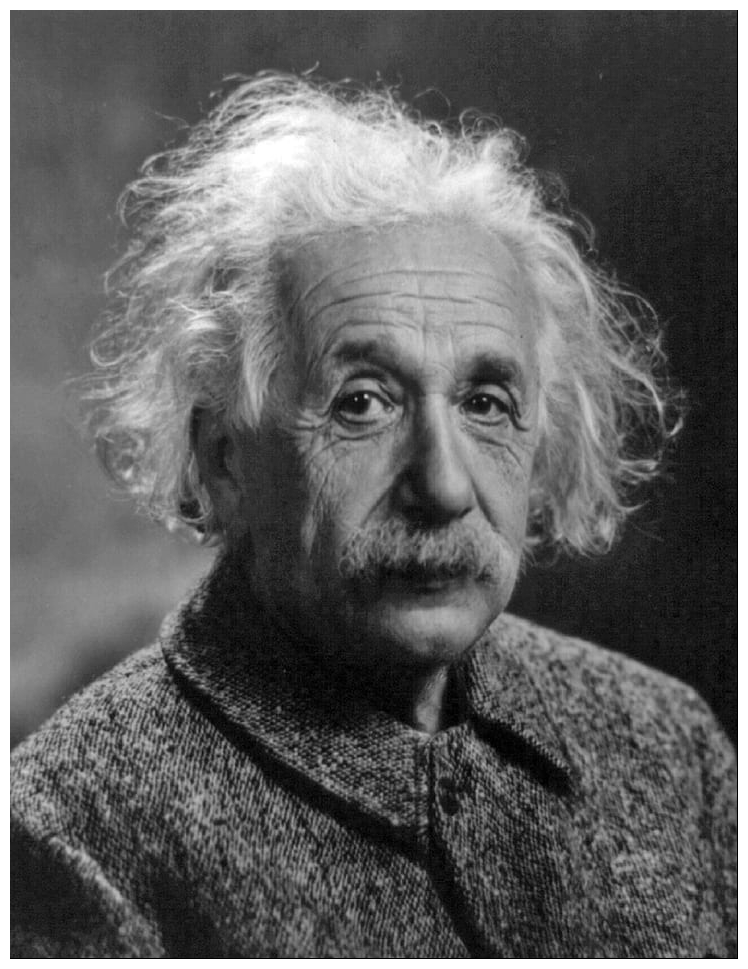

In [23]:
displayImageInActualSize(scale_image([1,1],I_grey))

# Scaling a colour image

In [27]:
import matplotlib as mpl
def displayImageInActualSizeColor(I):
    dpi = mpl.rcParams['figure.dpi']
    H,W = I.shape[0:2]
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I, cmap = 'gray')
    plt.show

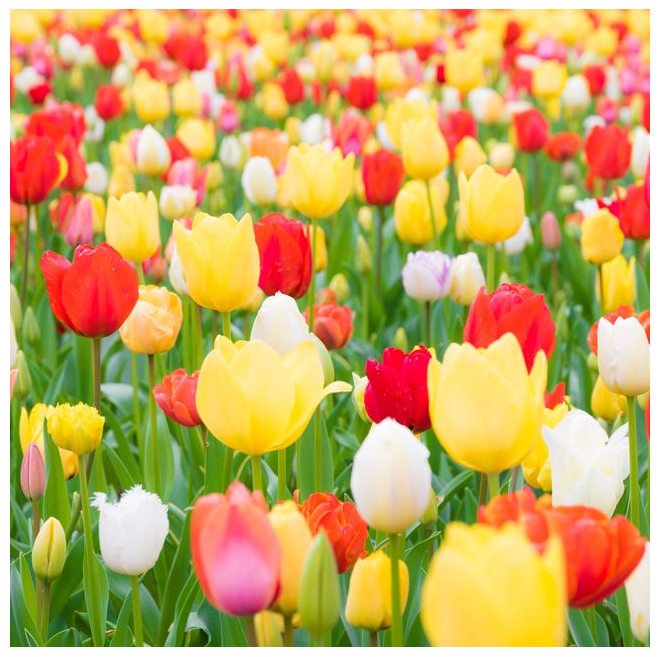

In [29]:
I_clr = I_BGR[:,:,::-1]
scale = [2,2]
r = scale_image(scale,I_clr[:,:,0]) # red channel
g = scale_image(scale,I_clr[:,:,1]) # green channel
b = scale_image(scale,I_clr[:,:,2]) # blue channel
displayImageInActualSizeColor(I_clr)

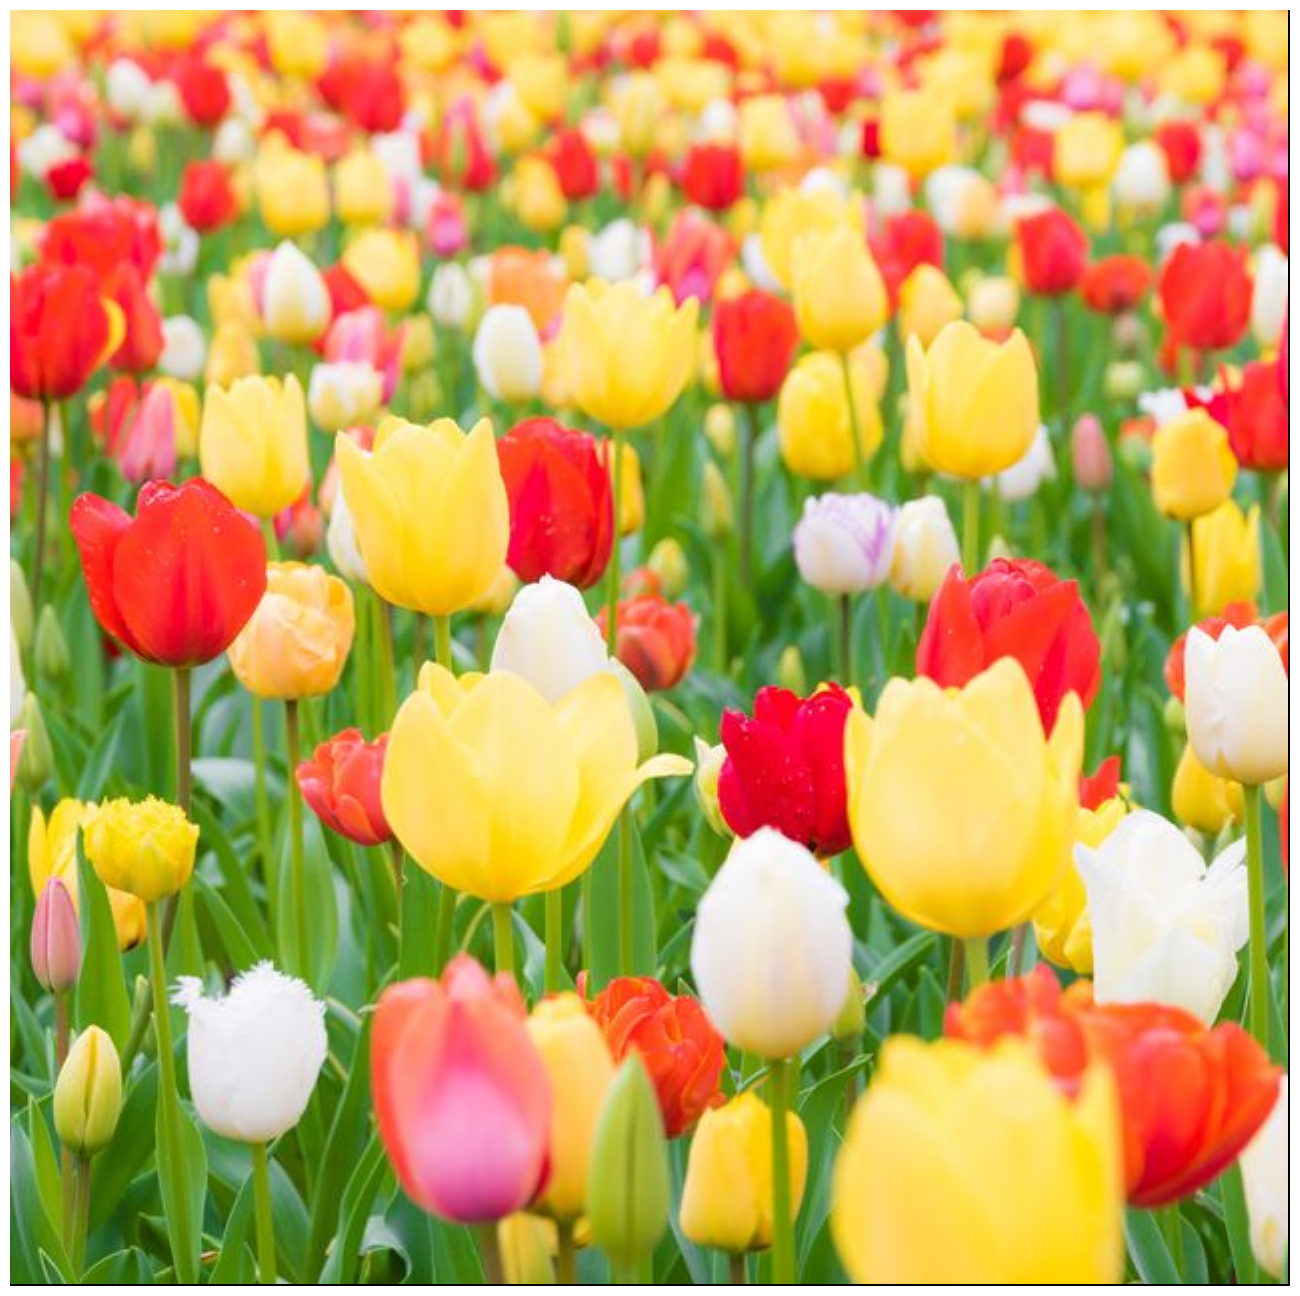

In [31]:
# merging colours
C = np.zeros((r.shape[0],r.shape[1],3),dtype=np.uint8)
C[:,:,0]=r
C[:,:,1]=g
C[:,:,2]=b
displayImageInActualSizeColor(C)